**Curso Ciencia de Datos**

**Ing. Marcelo Saavedra**

Ejemplo 1

Resolver el Problema de Los Lirios de Fisher mediante SVM

Precisión del modelo:  0.9333333333333333


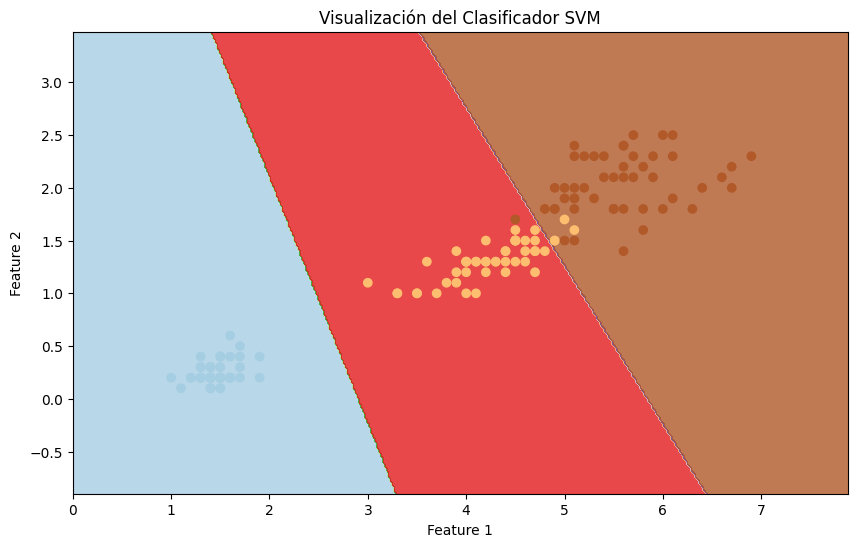

Matriz de confusión:
[[23  0  0]
 [ 0 23  4]
 [ 0  1 24]]


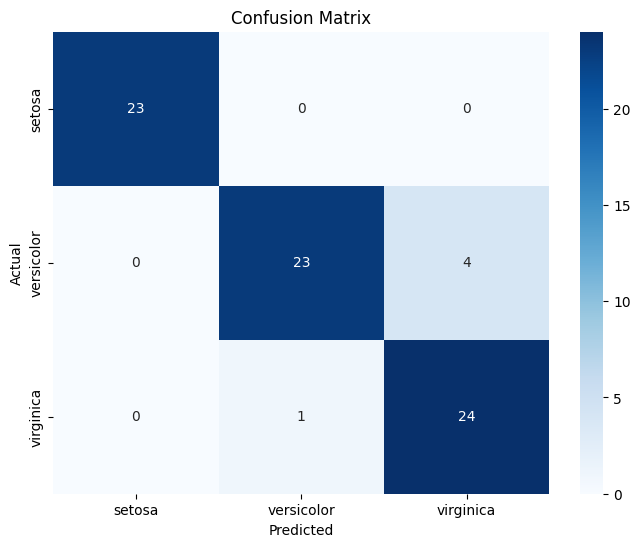

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# cargar el conjunto de datos de los lirios
iris = load_iris()

# Tomar solo las primeras dos características para la visualización
X = iris.data[:, 2:4]
y = iris.target

# dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

# crear un clasificador SVM
svm_classifier = SVC(kernel='linear', C=5, random_state=0)

# entrenar el clasificador SVM en el conjunto de entrenamiento
svm_classifier.fit(X_train, y_train)

# predecir las etiquetas de los datos de prueba utilizando el clasificador SVM entrenado
y_pred = svm_classifier.predict(X_test)

# calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: ", accuracy)

# Crear una cuadrícula para la visualización del espacio de decisión
h = 0.02  # Paso del mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Realizar predicciones en la cuadrícula
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar el espacio de decisión y los puntos de datos
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualización del Clasificador SVM')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Construir la matriz de confusión
confusion = confusion_matrix(y_test,y_pred)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()